## Минипроект по статистике 2
## Statistics Miniproject 2

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('~/conversion.csv')

In [143]:
unique_campaigns=len(data['xyz_campaign_id'].unique())
print('{} уникальных кампаний было проведено'.format(unique_campaigns))
print('{} unique campaigns were carried out'.format(unique_campaigns))

3 уникальных кампаний было проведено
3 unique campaigns were carried out


In [144]:
fb_log=data.groupby(['fb_campaign_id'],as_index=False).sum()\
       [['fb_campaign_id','Impressions']]

/Users/dmitry/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


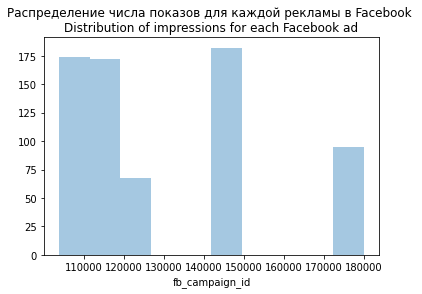

In [146]:
ax=sns.distplot(fb_log['fb_campaign_id'],kde=False)
ax.set_title('Распределение числа показов для каждой рекламы в Facebook \n'+ 
             'Distribution of impressions for each Facebook ad')
plt.show()

In [147]:
data['CTR']=data['Clicks']/data['Impressions']
data=data.sort_values('CTR',ascending=False)
data.head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


In [148]:
#916
CTR_916=data.query('xyz_campaign_id==916')[['CTR']]
CTR_936=data.query('xyz_campaign_id==936')[['CTR']]
CTR_1178=data.query('xyz_campaign_id==1178')[['CTR']]

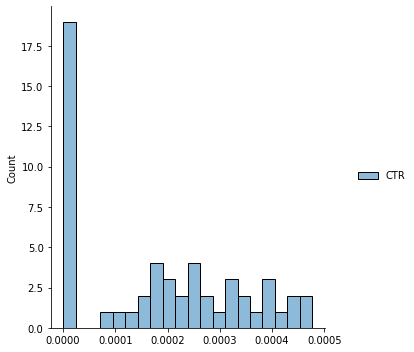

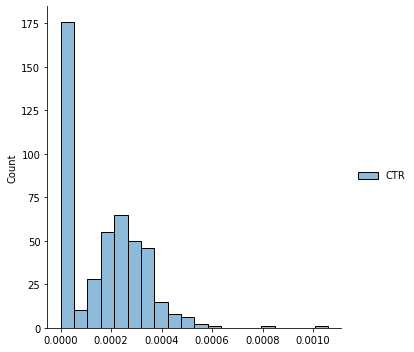

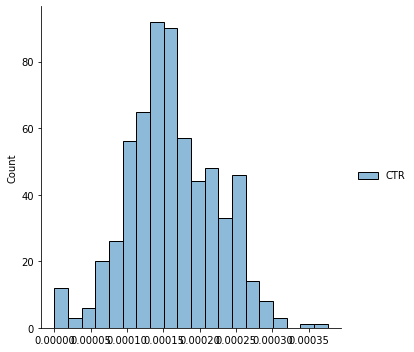

In [149]:
sns.displot(CTR_916,kde=False, bins=20)
sns.displot(CTR_936,kde=False, bins=20)
sns.displot(CTR_1178,kde=False, bins=20)
plt.show()

In [150]:
data['CPC']=data['Spent']/data['Clicks']

In [151]:
data['CPC'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

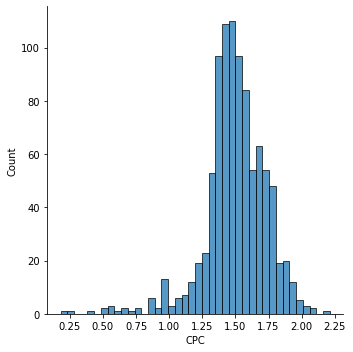

In [152]:
sns.displot(data['CPC'])

In [153]:
import scipy
print('Межквартильный размах: {}'.\
      format(round(scipy.stats.iqr(data['CPC'],nan_policy='omit'),2)))
print('Interquartile range: {}'.\
      format(round(scipy.stats.iqr(data['CPC'],nan_policy='omit'),2)))

Межквартильный размах: 0.25
Interquartile range: 0.25


In [154]:
print('Межквартильный размах: {}'.\
         format(round(data['CPC'].dropna().describe()[6] \
                     -data['CPC'].dropna().describe()[4],2)))
print('Interquartile range: {}'.\
         format(round(data['CPC'].dropna().describe()[6] \
                     -data['CPC'].dropna().describe()[4],2)))

Межквартильный размах: 0.25
Interquartile range: 0.25


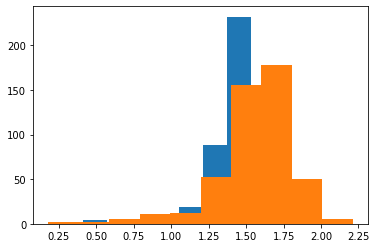

In [155]:
plt.hist(data.query('gender=="F"')['CPC'].dropna())
plt.hist(data.query('gender=="M"')['CPC'].dropna())
plt.show()

In [156]:
data['CR']=data['Approved_Conversion']/data['Clicks']
data[data['ad_id']==1121814]['CR']*100

860    3.087886
Name: CR, dtype: float64